In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.utils  import plot_model

In [2]:
# fashion_mnist.load_data() : fashion mnist 데이터를 읽어서 리턴
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
#X_train 이미지를 조회
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
#X_train이미지의 종류를 조회
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
#X_test 이미지를 조회
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
# X_test 이미지의 종류를 조회
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [7]:
#X_train.astype('float32')  :  X_train 이미지를 flat32 타입으로 변환
# 하고 255로 나눠줌
X_train = X_train.astype('float32') / 255.

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
#X_test.astype('float32')  :  X_test 이미지를 flat32 타입으로 변환
# 하고 255로 나눠줌
X_test = X_test.astype('float32') / 255.

In [10]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
# X_train의 shape 조회
# 28줄, 28칸의 이미지 6만개
X_train.shape

(60000, 28, 28)

In [12]:
# X_test 의 shape 조회
# 28줄, 28칸의 이미지 1만개
X_test.shape

(10000, 28, 28)

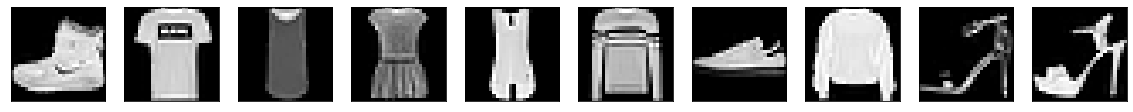

In [13]:
n = 10
# 그래프의 가로 세로 설정
plt.figure(figsize=(20, 4))
#10번 반복
for i in range(n):
  # 1줄 10칸중에 i+1번째 이미지 출력 준비
  ax = plt.subplot(1, n, i + 1)
  # 학습 이미지 출력
  plt.imshow(X_train[i])
  # 흑백으로 줄력
  plt.gray()
  #x축 좌표가 출력되지 않도록 설정
  ax.get_xaxis().set_visible(False)
  #y축 좌표가 출력되지 않도록 설정
  ax.get_yaxis().set_visible(False)


In [14]:
# CNN 계산을 하기 위해서 이미지를 4차원으로 변환
X_train = X_train.reshape(-1, 28, 28, 1)

In [15]:
X_train.shape

(60000, 28, 28, 1)

In [16]:
# CNN 계산을 하기 위해서 이미지를 4차원으로 변환
X_test = X_test.reshape(-1, 28, 28, 1)

In [17]:
X_test.shape

(10000, 28, 28, 1)

In [18]:
# tf.random.normal(shape=X_train.shape) : X_train의 줄 칸과 같은 난수 생성
# 해서 X_train에 더함 (기존의 이미지를 알아볼수 없음)
X_train_noisy = X_train +  tf.random.normal(shape=X_train.shape) 

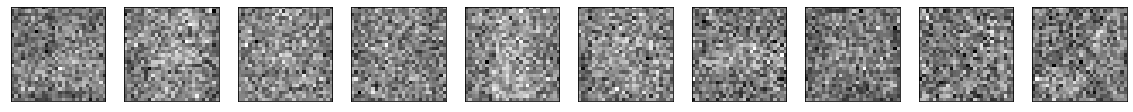

In [19]:
n = 10
# 그래프의 가로 세로 설정
plt.figure(figsize=(20, 4))
#10번 반복
for i in range(n):
  # 1줄 10칸중에 i+1번째 이미지 출력 준비
  ax = plt.subplot(1, n, i + 1)
  # tf.squeeze : 3차원인 X_train_noisy의 차원을 1개 줄여서 2차원으로 만듬
  # plt.imshow :  학습 이미지 + 난수 출력 => 기존의 이미지를 알아볼수 없음
  plt.imshow(tf.squeeze(X_train_noisy[i]))
  # 흑백으로 줄력
  plt.gray()
  #x축 좌표가 출력되지 않도록 설정
  ax.get_xaxis().set_visible(False)
  #y축 좌표가 출력되지 않도록 설정
  ax.get_yaxis().set_visible(False)

In [20]:
noise_factor = 0.2
# tf.random.normal(shape=X_train.shape) : X_train의 줄 칸과 같은 난수 생성
# 해서 X_train에 난수*0.2 를 더함 (난수의 값이 적어져서 기존의 이미지를 알아볼수 있음)
X_train_noisy = X_train + noise_factor * tf.random.normal(shape=X_train.shape)

# tf.random.normal(shape=X_test.shape) : X_train의 줄 칸과 같은 난수 생성
# 해서 X_train에 난수*0.2 를 더함 (난수의 값이 적어져서 기존의 이미지를 알아볼수 있음)
X_test_noisy = X_test + noise_factor * tf.random.normal(shape=X_test.shape) 


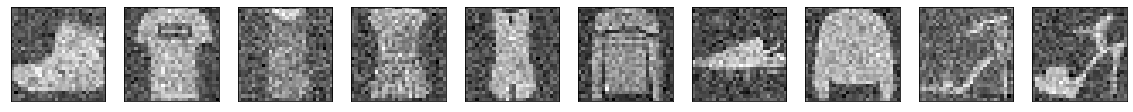

In [21]:
n = 10
# 그래프의 가로 세로 설정
plt.figure(figsize=(20, 4))
#10번 반복
for i in range(n):
  # 1줄 10칸중에 i+1번째 이미지 출력 준비
  ax = plt.subplot(1, n, i + 1)
  # tf.squeeze : 3차원인 X_train_noisy의 차원을 1개 줄여서 2차원으로 만듬
  # plt.imshow :  학습 이미지 + 난수*0.2 출력 => 기존의 이미지를 알아볼수 있음
  plt.imshow(tf.squeeze(X_train_noisy[i]))
  # 흑백으로 줄력
  plt.gray()
  #x축 좌표가 출력되지 않도록 설정
  ax.get_xaxis().set_visible(False)
  #y축 좌표가 출력되지 않도록 설정
  ax.get_yaxis().set_visible(False)

In [22]:
X_train_noisy[0]

<tf.Tensor: shape=(28, 28, 1), dtype=float32, numpy=
array([[[-2.70420816e-02],
        [-1.68867856e-02],
        [-3.14073533e-01],
        [-7.95028806e-02],
        [-3.93772386e-02],
        [-1.81216285e-01],
        [-5.99434450e-02],
        [-3.60891819e-02],
        [-1.40073849e-02],
        [-3.23464498e-02],
        [-3.51086706e-01],
        [-4.29045975e-01],
        [ 2.48364329e-01],
        [ 1.06176533e-01],
        [ 2.37249121e-01],
        [ 4.15815450e-02],
        [-4.39976305e-02],
        [ 1.88123658e-01],
        [-4.00734723e-01],
        [ 1.53842911e-01],
        [ 4.23677117e-01],
        [ 1.51079996e-02],
        [-2.65703890e-02],
        [-5.16489930e-02],
        [-2.52556235e-01],
        [-1.82353929e-02],
        [ 2.18857393e-01],
        [ 2.21000865e-01]],

       [[ 1.58650860e-01],
        [ 1.12088136e-01],
        [-1.30753398e-01],
        [ 4.48626466e-02],
        [-3.33896011e-01],
        [ 2.04216346e-01],
        [ 2.61924684e-01],


In [23]:
# 이미지는 0~1사이 값을 가져야 하기 때문에
#X_train_noisy에서 
#clip_value_min=0 : 0보다 작은 값은 0으로 치환
# clip_value_max=1. : 1보다 쿤값은 1로 치환
X_train_noisy = tf.clip_by_value(X_train_noisy, clip_value_min=0., clip_value_max=1.)

# 이미지는 0~1사이 값을 가져야 하기 때문에
#X_test_noisy에서 
#clip_value_min=0 : 0보다 작은 값은 0으로 치환
# clip_value_max=1. : 1보다 쿤값은 1로 치환
X_test_noisy = tf.clip_by_value(X_test_noisy, clip_value_min=0., clip_value_max=1.)

In [24]:
X_train_noisy[0]

<tf.Tensor: shape=(28, 28, 1), dtype=float32, numpy=
array([[[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [2.48364329e-01],
        [1.06176533e-01],
        [2.37249121e-01],
        [4.15815450e-02],
        [0.00000000e+00],
        [1.88123658e-01],
        [0.00000000e+00],
        [1.53842911e-01],
        [4.23677117e-01],
        [1.51079996e-02],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [2.18857393e-01],
        [2.21000865e-01]],

       [[1.58650860e-01],
        [1.12088136e-01],
        [0.00000000e+00],
        [4.48626466e-02],
        [0.00000000e+00],
        [2.04216346e-01],
        [2.61924684e-01],
        [0.00000000e+00],
        [

In [25]:
X_test_noisy[0].shape

TensorShape([28, 28, 1])

In [26]:
tf.squeeze(X_test_noisy[0]).shape

TensorShape([28, 28])

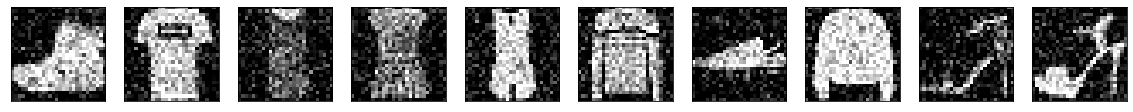

In [27]:
n = 10
# 그래프의 가로 세로 설정
plt.figure(figsize=(20, 4))
#10번 반복
for i in range(n):
  # 1줄 10칸중에 i+1번째 이미지 출력 준비
  ax = plt.subplot(1, n, i + 1)
  # tf.squeeze : 3차원인 X_train_noisy의 차원을 1개 줄여서 2차원으로 만듬
  # plt.imshow :  학습 이미지 + 난수*0.2 출력 => 기존의 이미지를 알아볼수 있음
  plt.imshow(tf.squeeze(X_train_noisy[i]))
  # 흑백으로 줄력
  plt.gray()
  #x축 좌표가 출력되지 않도록 설정
  ax.get_xaxis().set_visible(False)
  #y축 좌표가 출력되지 않도록 설정
  ax.get_yaxis().set_visible(False)

In [28]:

from tensorflow.keras.layers import Input,Conv2D,Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.utils  import plot_model

In [29]:
encoder = Sequential([
      # 16개 필터를 이용해서 CNN연산을 통해 이미지의 특성을 추출                
      Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same', strides=2 , input_shape=(28,28,1)),
      # 8개 필터를 이용해서 CNN연산을 통해 이미지의 특성을 추출 
      Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same', strides=2)
      ])

In [30]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


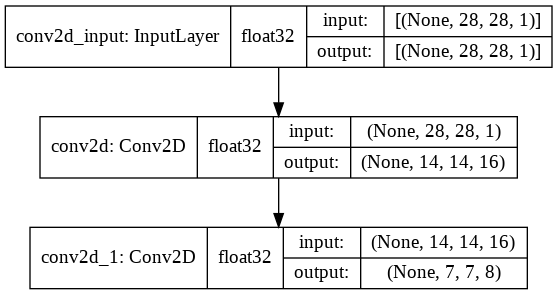

In [31]:
# 인코더의 모양 조회
plot_model(encoder, show_dtype=True, show_shapes=True)

In [32]:
decoder = Sequential([
      # 8개의 필터로 합성곱한 결과를 입력받아서 이미지로 복구                
      Conv2DTranspose(filters=8, kernel_size=3, strides=2, activation='relu', padding='same' , input_shape=(7,7,8)),
      # 16개의 필터로 합성곱한 결과를 입력받아서 이미지로 복구 
      Conv2DTranspose(filters=16, kernel_size=3, strides=2, activation='relu', padding='same'),
      # 1개의 필터로 합성곱 연산 
      Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')
      ])

In [33]:
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose (Conv2DTran (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


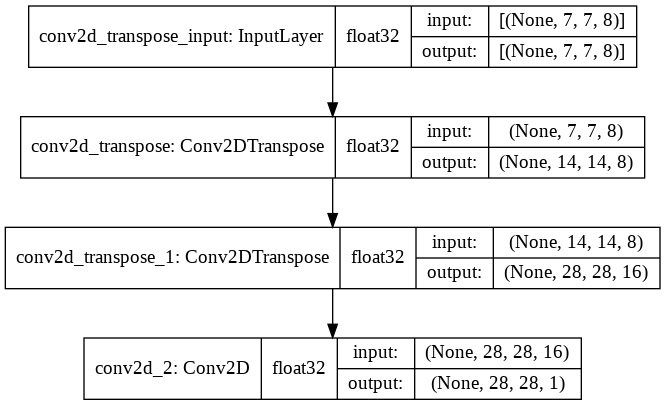

In [34]:
# 디코더의 모양 조회
plot_model(decoder, show_dtype=True, show_shapes=True)

In [35]:
class Autoencoder(Model):
    #객체 생성시 실행되는 함수
    #인코더와 디코더를 입력 받아서 속성에 저장  
    def __init__(self, encoder, decoder):
        super(Autoencoder, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
    
    # 학습할때 실행되는 함수
    # 매개변수 x : 학습, 테스트 데이터
    def call(self, x):
        # 학습 또는 테스트 데이터를 encoder 연산 실행 (28줄 28칸의 784개 데이터를 64개로 줄임 => 이미지의 중요한 정보만 남음 )  
        encoded = self.encoder(x)
        # 인코딩한 이미지의 중요한 정보를 이용해서 원래 이미지로 복원 
        decoded = self.decoder(encoded)
        return decoded

In [36]:
# 오토 인코더 객체 생성
auto_encoder = Autoencoder(encoder, decoder) 

In [37]:
# 오토인코더 옵티마이저 loss 함수 설정
auto_encoder.compile(optimizer=Adam( learning_rate=0.001), loss=MeanSquaredError())

In [38]:
# 오토 인코더 학습
auto_encoder.fit(X_train_noisy, X_train,
                epochs=30,
                shuffle=True,
                validation_data=(X_test_noisy, X_test))

Epoch 1/30
1875/1875 [==============================] - 22s 3ms/step - loss: 0.0209 - val_loss: 0.0128
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0113 - val_loss: 0.0104
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0099 - val_loss: 0.0097
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0092 - val_loss: 0.0089
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0087 - val_loss: 0.0087
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0085 - val_loss: 0.0086
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0083 - val_loss: 0.0082
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0081 - val_loss: 0.0081
Epoch 9/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0080 - val_loss: 0.0080
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.00

In [39]:
# X_test를 인코더를 이용해서 64개의 데이터로 압축
encoded_imgs = auto_encoder.encoder(X_test_noisy).numpy()

In [40]:
encoded_imgs[0]

array([[[2.0962317 , 0.5970976 , 1.5960767 , 1.3925313 , 1.8765241 ,
         2.7391675 , 1.8802603 , 1.7583044 ],
        [1.666965  , 0.5788813 , 1.2869527 , 1.5175258 , 1.407143  ,
         2.6609833 , 1.8282588 , 1.5238092 ],
        [1.4062526 , 1.2644582 , 1.3822803 , 1.766545  , 1.5690403 ,
         2.6913445 , 1.9657346 , 1.1044831 ],
        [1.4914942 , 0.        , 1.7642832 , 1.6577022 , 1.7286391 ,
         3.5694482 , 2.6864073 , 1.5337203 ],
        [1.4830775 , 0.19900674, 2.1234848 , 1.5956639 , 1.6581427 ,
         2.6299615 , 2.2733228 , 1.5037622 ],
        [1.2272699 , 0.7435434 , 1.3527642 , 1.8023638 , 1.4159755 ,
         2.3851933 , 2.1276515 , 1.0965092 ],
        [1.9989145 , 0.8999006 , 1.844792  , 2.003057  , 1.3145694 ,
         2.7092292 , 2.2159643 , 0.73868805]],

       [[1.5714886 , 0.181449  , 1.6982769 , 1.678232  , 1.763366  ,
         3.2676735 , 2.735318  , 1.6867797 ],
        [1.3918011 , 0.22336924, 2.3150477 , 1.7774    , 1.7337663 ,
         

In [41]:
encoded_imgs[0].shape

(7, 7, 8)

In [42]:
# 압축한 데이터를 원래 이미지로 복구
decoded_imgs = auto_encoder.decoder(encoded_imgs).numpy()

In [43]:
decoded_imgs[0]

array([[[3.26165743e-03],
        [5.30380895e-03],
        [1.09112682e-02],
        [5.65663818e-03],
        [7.89824408e-03],
        [6.79453509e-03],
        [7.46514322e-03],
        [5.36764227e-03],
        [1.02121243e-02],
        [1.91912651e-02],
        [2.08535735e-02],
        [4.48096357e-03],
        [2.21659848e-03],
        [1.92999362e-03],
        [1.91714417e-03],
        [1.14840211e-03],
        [1.94329314e-03],
        [2.51382147e-03],
        [4.22638888e-03],
        [3.73240840e-03],
        [5.70044760e-03],
        [6.40844693e-03],
        [7.70306448e-03],
        [3.24532320e-03],
        [5.45091834e-03],
        [1.46560445e-02],
        [2.67436020e-02],
        [2.17501633e-02]],

       [[5.97032905e-03],
        [1.78158171e-02],
        [2.98234317e-02],
        [1.14279399e-02],
        [1.89547818e-02],
        [5.93843125e-03],
        [4.96127503e-03],
        [4.89932718e-03],
        [1.82775538e-02],
        [2.57608723e-02],
        [1

In [44]:
decoded_imgs[0].shape

(28, 28, 1)

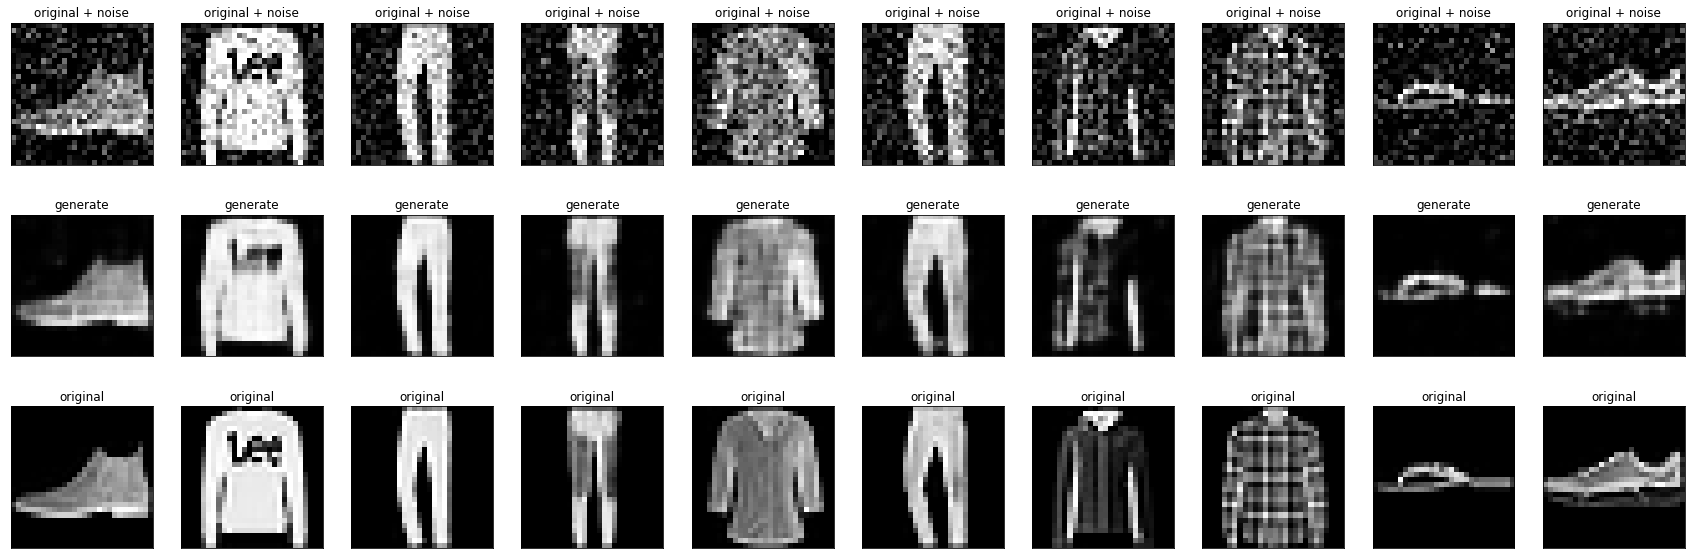

In [45]:
n = 10
# 그래프의 가로 세로 설정
plt.figure(figsize=(30, 10))
#10번 반복
for i in range(n):
  # 3줄 10칸중에 i+1번째 이미지 출력 준비
  ax = plt.subplot(3, n, i + 1)
  plt.title("original + noise")
  # 테스트 이미지 출력
  #tf.squeeze : 3차원인 X_test[i] 를 2차원으로 차원 축소
  plt.imshow(tf.squeeze(X_test_noisy[i]))
  # 흑백으로 줄력
  plt.gray()
  #x축 좌표가 출력되지 않도록 설정
  ax.get_xaxis().set_visible(False)
  #y축 좌표가 출력되지 않도록 설정
  ax.get_yaxis().set_visible(False)

  # 3줄 10칸중에 i+1 + n(10) 번째 이미지 출력 준비
  ax = plt.subplot(3, n, i + 1 + n)
  plt.title("generate")
  # 생성 이미지 출력
  #tf.squeeze : 3차원인 decoded_imgs[i] 를 2차원으로 차원 축소
  plt.imshow(tf.squeeze(decoded_imgs[i]))
  # 흑백으로 줄력
  plt.gray()
  #x축 좌표가 출력되지 않도록 설정
  ax.get_xaxis().set_visible(False)
  #y축 좌표가 출력되지 않도록 설정
  ax.get_yaxis().set_visible(False)

  # 3줄 10칸중에 i+1 + n*2(10) 번째 이미지 출력 준비
  ax = plt.subplot(3, n, i + 1 + n*2)
  plt.title("original")
  # 잡음이 없는 원본 이미지 출력
  #tf.squeeze : 3차원인 X_test[i] 를 2차원으로 차원 축소
  plt.imshow(tf.squeeze(X_test[i]))
  # 흑백으로 줄력
  plt.gray()
  #x축 좌표가 출력되지 않도록 설정
  ax.get_xaxis().set_visible(False)
  #y축 좌표가 출력되지 않도록 설정
  ax.get_yaxis().set_visible(False)